CIFAR10 models adopted from https://github.com/huyvnphan/PyTorch_CIFAR10

In [1]:
#  Colab only
from google.colab import drive
%matplotlib inline


drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Base Imports

In [2]:
import sys
import torch
from torchvision.datasets import CIFAR10, MNIST

PATH = "/content/drive/My Drive/Colab Notebooks/EECS553ML_reproduce/"
sys.path.append(PATH)

In [3]:
import dataset


dataset.MODEL = "ResNet-34"
DATA = MNIST
#DATA = CIFAR10

# Model

In [4]:
if DATA is CIFAR10:
    import PyTorch_CIFAR10.cifar10_models.resnet as resnet
    model = resnet.resnet34(pretrained=True)
else:
    import resnet34 as resnet
    model = resnet.resnet34()
    model.load_state_dict(
        torch.load(
            PATH + "mnist_resnet34_model.t7", 
            map_location=torch.device("cpu")
          )
    )

model.eval()

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## Model Accuracy

In [5]:
#### Import data from Keras
import tensorflow.keras as keras
from dataset import Dataset


ds = Dataset(model, DATA)

In [6]:
print("Accuracy of the network on test images:", 
      ds.accuracy_pytorch())

Accuracy of the network on test images: 0.1136


In [7]:
print(f"Model accuracy:", ds.accuracy())

Model accuracy: 0.9856


K = 8
Prediction time for batch size 8: 0.360619 seconds
100% completed
Time: 106.851462 seconds
K = 12
Prediction time for batch size 12: 0.530866 seconds
100% completed
Time: 160.343156 seconds


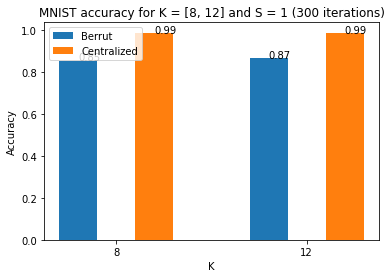

In [8]:
ds.plot_K(S=1, K_list=[8, 12])

K = 8
Prediction time for batch size 8: 0.390765 seconds
100% completed
Time: 112.460164 seconds


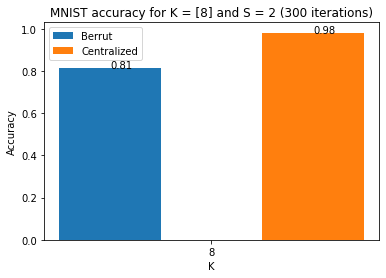

In [9]:
ds.plot_K(S=2)

K = 8
Prediction time for batch size 8: 0.431599 seconds
100% completed
Time: 121.218599 seconds


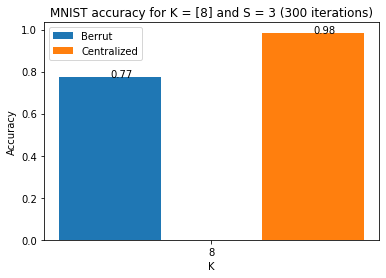

In [10]:
ds.plot_K(S=3)